In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import missingno as msno
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../input/wind_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [3]:
df['DATE']=pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
DATE,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [5]:
missing_columns_continuous = ["T.MAX","T.MIN","T.MIN.G"]
missing_columns_discrete = ["IND.1","IND.2"]
missing_columns = missing_columns_continuous + missing_columns_discrete

In [6]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [7]:
new_data = pd.DataFrame(columns = ["new_" + name for name in missing_columns])

for feature in missing_columns:
    print(feature)
    new_data["new_" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    #Create a Linear Regression model to estimate the missing data
    if feature in missing_columns_continuous:
        model = linear_model.LinearRegression()
        model.fit(X = df[parameters], y = df[feature + '_imp'])
    else:
        model = KNeighborsClassifier(n_neighbors=2)
        model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    new_data.loc[df[feature].isnull(), "new_" + feature] = model.predict(df[parameters])[df[feature].isnull()]

T.MAX
T.MIN
T.MIN.G
IND.1
IND.2


<AxesSubplot:xlabel='DATE'>

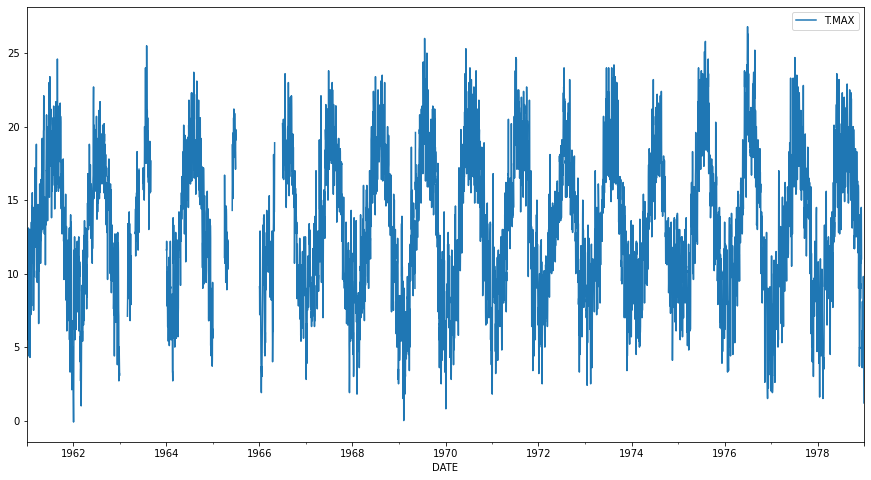

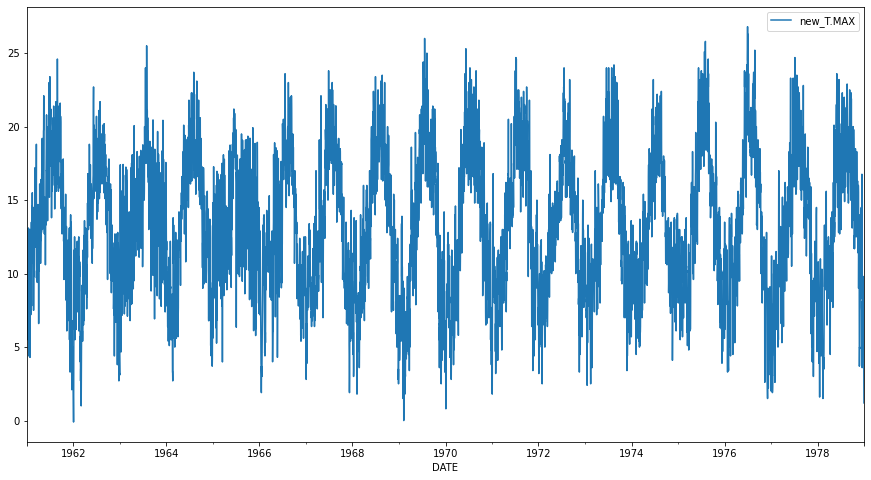

In [8]:
df.plot(y='T.MAX',figsize=(15,8))
new_data.plot(y='new_T.MAX',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

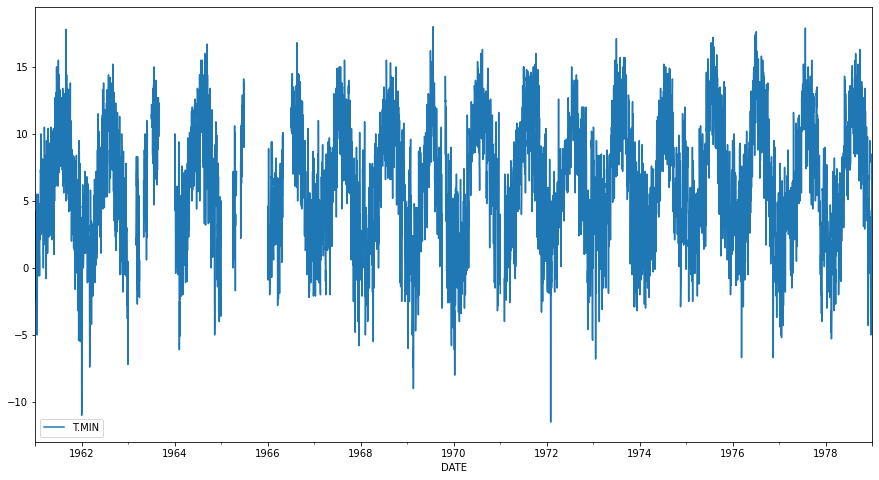

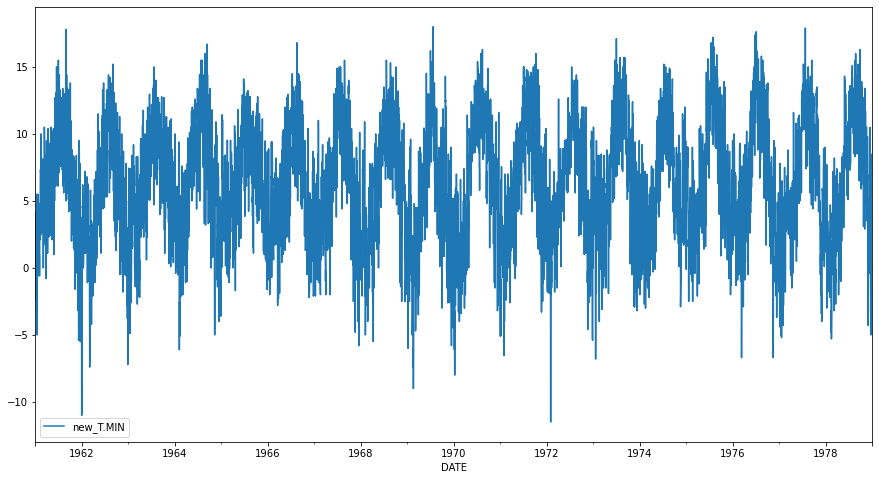

In [9]:
df.plot(y='T.MIN',figsize=(15,8))
new_data.plot(y='new_T.MIN',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

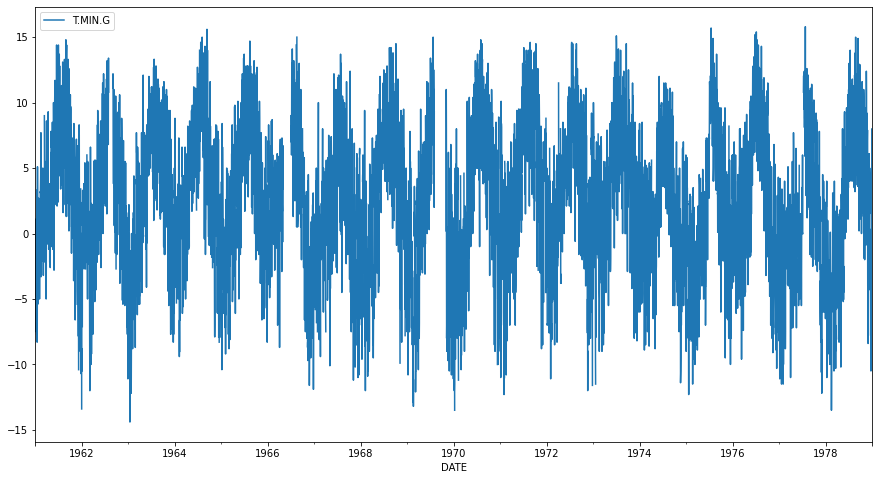

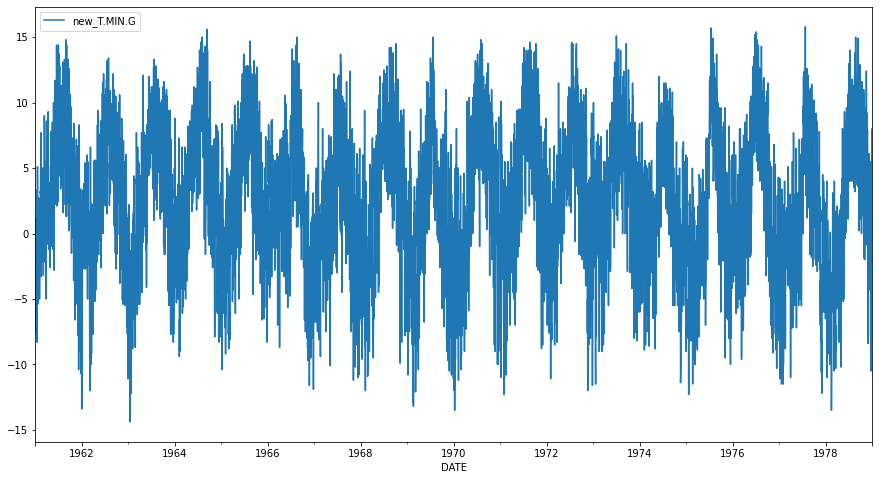

In [10]:
df.plot(y='T.MIN.G',figsize=(15,8))
new_data.plot(y='new_T.MIN.G',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

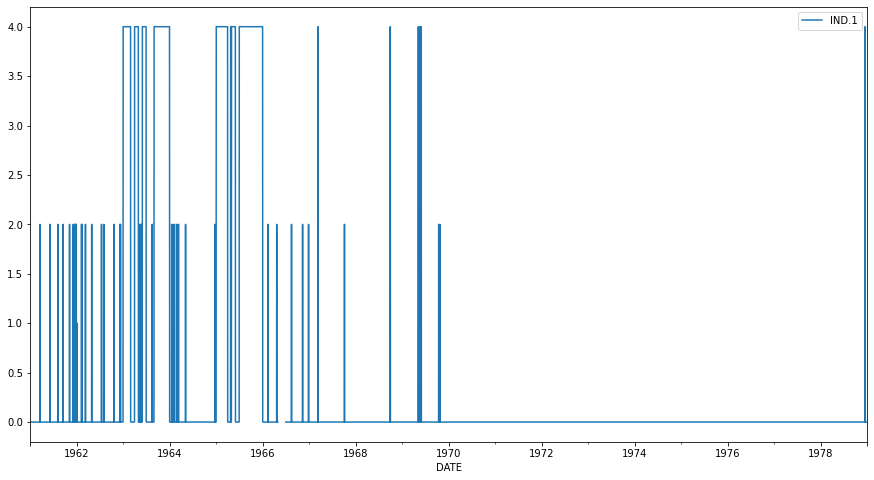

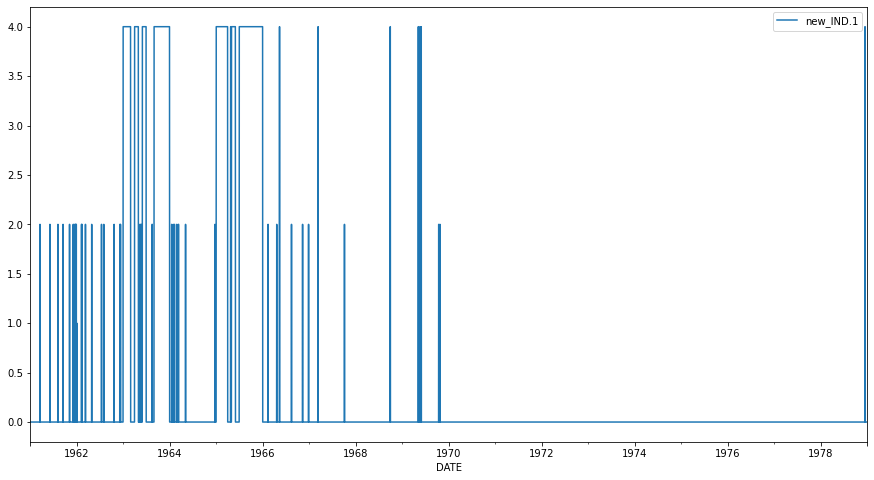

In [11]:
df.plot(y='IND.1',figsize=(15,8))
new_data.plot(y='new_IND.1',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

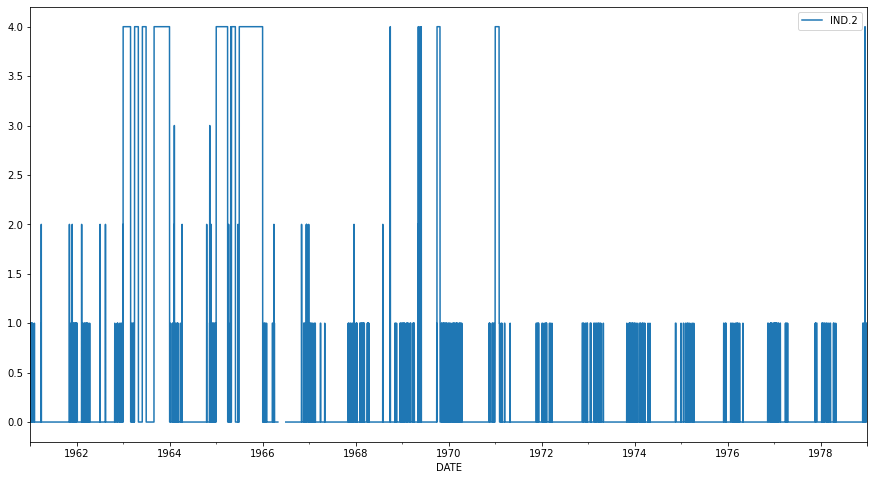

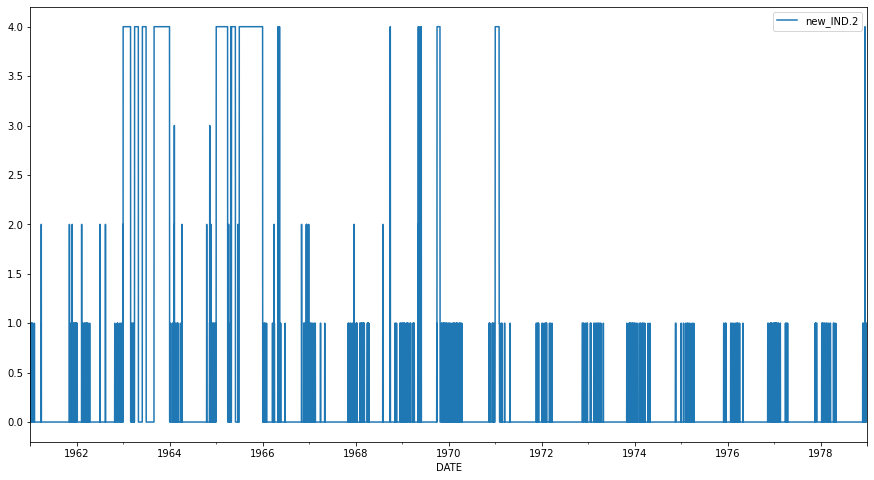

In [12]:
df.plot(y='IND.2',figsize=(15,8))
new_data.plot(y='new_IND.2',figsize=(15,8))

In [13]:
df["IND.1"] = new_data["new_IND.1"]
df["IND.2"] = new_data["new_IND.2"]
df["T.MAX"] = new_data["new_T.MAX"]
df["T.MIN"] = new_data["new_T.MIN"]
df["T.MIN.G"] = new_data["new_T.MIN.G"]
df = df.drop(df.columns.difference(["WIND","IND","RAIN","IND.1","T.MAX","T.MIN","T.MIN.G","IND.2"]),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6574 non-null   float64
 4   T.MAX    6574 non-null   float64
 5   IND.2    6574 non-null   float64
 6   T.MIN    6574 non-null   float64
 7   T.MIN.G  6574 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 462.2 KB


## SAVE

In [16]:
df.to_csv('../input/wind_dataset_imputed2.csv')